In [11]:
import numpy as np 
import matplotlib.pylab as plt 

### Activation function

y = h(b + w1x1 + ...)

1. step function... 1 when value is >= 0, 0 otherwise.
2. sigmoid.. y = 0.5 when x = 0. 0 <= y <= 1. log function!
3. ReLU

both are non-linear.

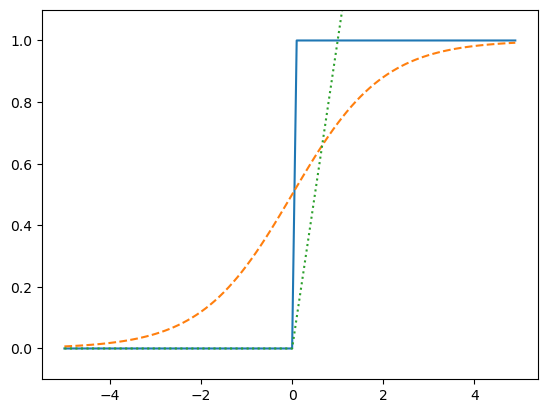

In [12]:
def step_function(x):
    y = x > 0
    return y.astype(int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    # return 0 if x < 0 else x
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)

y1 = step_function(x)
y2 = sigmoid(x)
y3 = ReLU(x)

plt.plot(x, y1)
plt.plot(x, y2, linestyle = "--")
plt.plot(x, y3, linestyle = ":")

plt.ylim(-0.1, 1.1)
plt.show()

multiple layers of linear function .. also linear.

so we SHOULD use non-linear function as activation fuction.

In [13]:
# some np functions

A = np.array([1, 2, 3, 4])

np.ndim(A) # dimensions

A.shape # shape of array (tuple)

A.shape[0] # first element of shape of array.

# Note that..
X = np.array([1, 2]) 

X.shape # not (1, 2), but (2, ). -> dimension = 1

W = np.array([[1, 3, 5], [2, 4, 6]])

ans = np.dot(X, W)
print(ans)

[ 5 11 17]


Implementation of 3-layer NN

In [14]:
X = np.array([0.1, 0.2])
X.shape # (2, )

W = np.array([[1, 2, 3],[4, 5, 6]])
W.shape # (2, 3)

B1 = np.array([0.1, 0.2, 0.3])
B1.shape # (3, )

# (2, ) * (2, 3) = (3, )

# Y = first layer values
Y = sigmoid(np.dot(X, W) + B1)
print(Y.shape) # (3, )

# second layer values...

(3,)


softmax
~ interpreted as "Probability"

In [15]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)

sum_exp_a = sum(exp_a)

softmax = exp_a / sum_exp_a
print(softmax)

# what about overflow?

[0.01821127 0.24519181 0.73659691]


# softmax tricks

yk = exp(ak) / sum(exp(ai))
   = C * exp(ak) / C * sum(exp(ai))
   = exp(ak + logC) / sum(exp(ai + logC))
   = exp(ak + C') / sum(exp(ai + C'))

In [16]:
a = np.array([1010, 1000, 990])

np.exp(a) / np.sum(np.exp(a)) 

# nans..
# solution) use C'

c = np.max(a)
np.exp(a-c) / np.sum(np.exp(a-c))



C:\Users\a\AppData\Local\Temp\ipykernel_31212\3172194998.py:3: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
C:\Users\a\AppData\Local\Temp\ipykernel_31212\3172194998.py:3: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [17]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

Recognition of MNIST

Dataset from "Introduction to Machine Learning; SNU2025-1"

* this dataset is different from original dataset. (16 x 16)

In [18]:
# Get datasets(16x16 pixel images)
# source code by SNUIML, GPT

from pathlib import Path
import numpy as np

# 1. Get train set
path = Path("trainset.csv")

with path.open() as f: 
    lines = f.readlines()

data = [list(map(int, line.strip().split(','))) for line in lines[1:]]

data = np.array(data)

t_train = data[:, 0]        
x_train = data[:, 1:]

# check
print("x_train.shape:", x_train.shape)
print("t_train.shape:", t_train.shape)

# print(x_train[1][1])

# 2. Get evaluation set
path = Path("evalset.csv")

with path.open() as f: 
    lines = f.readlines()

data = [list(map(int, line.strip().split(','))) for line in lines[1:]]

data = np.array(data)

t_eval = data[:, 0]        
x_eval = data[:, 1:]

# check
print("x_eval.shape:", x_eval.shape)
print("t_eval.shape:", t_eval.shape)

x_train.shape: (300, 256)
t_train.shape: (300,)
x_eval.shape: (300, 256)
t_eval.shape: (300,)


Note)

np.array.flatten() -> makes nparray 1-d

One hot Encoding: only one element indicates 1, otherwise 0.

ex) [1, 0, 0, ... 0]

In [19]:
# image test

from PIL import Image
from IPython.display import display

for i in range(0,300,30):
    
    img_array = x_train[i].reshape((16, 16)).astype(np.uint8)

    img = Image.fromarray(img_array, mode = 'L') # L means 0~255 monochrome

    display(img)

from now, we will initialize and regulate 'weights' of NN for this dataset.. 

if input data is single..

X = (256,)
W1 = (256, num1)
W2 = (num1, num2)..
..
WN = (num(n-1), 10)
Y = (10,)

if multiple sets

X = (10, 256)
W1 = (256, num1)
..
WN = (num(n-1), 10)
Y = (100, 10)